In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the GDP per capita dataset from the "data" folder

gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
#inspect the first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [4]:
#inspect the last 10 rows
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [5]:
#How many rows and columns does gdp_df have? What are the data types of its columns? 
#If any of the columns are not the expected types, figure out why and fix it.
gdp_df.describe()

,Year,Value,Value Footnotes
count,7176.000000,7176.000000,0.0
mean,2005.405936,16958.938497,NaN
std,8.853043,19243.365228,NaN
min,1990.000000,436.720371,NaN
25%,1998.000000,3591.252337,NaN
50%,2006.000000,9990.901202,NaN
75%,2013.000000,23478.750495,NaN
max,2020.000000,161971.464700,NaN


In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
gdp_df['Value Footnotes'].sum()

0.0

####  There are four columns and 7176 rows in the dataframe.

- Country or Area = object


- Year = integer

- value = float

- value Footnotes = Float

Value footnotes is not supposed to be a float data type and the column is empty

In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [9]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "Gdp_Per_Capita"})

In [10]:
gdp_df.groupby(['Year']).count()

,Country,Gdp_Per_Capita
Year,,
1990,206,206
1991,207,207
1992,208,208
1993,209,209
1994,211,211
1995,222,222
1996,222,222
1997,226,226
1998,226,226


Years from 1990 to 2020 are represented in the dataset. Each year the number of observations vary.
In 1990 206 Countries were surveyed which in 2020 went upto 240 in 2020.

In [11]:
# pd.options.display.max_rows = None
gdp_df.groupby('Country').count().sort_values('Year').head(5)

,Year,Gdp_Per_Capita
Country,,
Somalia,8,8
Djibouti,8,8
Turks and Caicos Islands,10,10
Sint Maarten (Dutch part),10,10
Kosovo,13,13


In [12]:
gdp_df[gdp_df['Country']== 'Somalia']

,Country,Year,Gdp_Per_Capita
5871,Somalia,2020,1180.965971
5872,Somalia,2019,1186.450871
5873,Somalia,2018,1129.531464
5874,Somalia,2017,1079.112443
5875,Somalia,2016,1081.763907
5876,Somalia,2015,1026.038180
5877,Somalia,2014,917.876549
5878,Somalia,2013,877.301005


242 countries are represented in this dataset

Somalia, Djibouti, Turks and Caicos islands, Sint Maarten have the least representation.

The reason for this is that these countries' data only recently began to be taken into account

In [13]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]

In [14]:
# Summary statistics of gdp_2014 dataframe.
gdp_2014.describe()

,Year,Gdp_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714573
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874690
75%,2014.0,26461.384185
max,2014.0,155201.740600


array([[<Axes: title={'center': 'Gdp_Per_Capita'}>]], dtype=object)

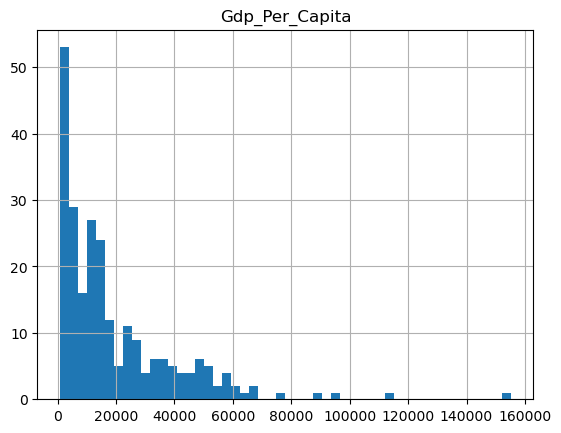

In [15]:
gdp_2014.hist('Gdp_Per_Capita', bins=50)

Heavily right skewed distribution

In [16]:
# Top 5 countries by per capita
gdp_df[gdp_df['Year']==2018].nlargest(5, ['Gdp_Per_Capita'])

,Country,Year,Gdp_Per_Capita
3915,"Macao SAR, China",2018,132373.54410
3884,Luxembourg,2018,115049.92610
5722,Singapore,2018,98336.95649
5383,Qatar,2018,90970.06090
3073,Ireland,2018,83726.36296


In [17]:
#Bottom 5 countries by per capita
gdp_df[gdp_df['Year']==2018].nsmallest(5, ['Gdp_Per_Capita'])

,Country,Year,Gdp_Per_Capita
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348


In [18]:
gdp_pivoted = pd.pivot_table(gdp_df[(gdp_df['Year']==2018) | (gdp_df['Year']==1990)], index = ['Country'], values = 'Gdp_Per_Capita',columns = ['Year'], dropna = True)

In [19]:
gdp_pivoted.head()

Year,1990,2018
Country,,
Afghanistan,NaN,2033.804389
Africa Eastern and Southern,3083.976800,3697.317275
Africa Western and Central,2810.341129,4132.592996
Albania,4827.034551,13317.092310
Algeria,8746.340762,11630.679410


In [20]:
gdp_pivoted = gdp_pivoted.dropna()

In [21]:
gdp_pivoted['Percent_Change']= 100*((gdp_pivoted[2018]-gdp_pivoted[1990])/gdp_pivoted[1990])

In [22]:
(gdp_pivoted['Percent_Change']<0).sum()

17

There are 17 countries that experienced a negative percent change in GDP

In [23]:
gdp_pivoted['Percent_Change'].nlargest(2)

Country
Equatorial Guinea    1860.221821
China                 962.857956
Name: Percent_Change, dtype: float64

In [24]:
gdp_pivoted.head()

Year,1990,2018,Percent_Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092310,175.885581
Algeria,8746.340762,11630.679410,32.977661
Angola,5758.950488,6982.129420,21.239615


In [25]:
gdp_EGC = gdp_df[(gdp_df['Country']=='Equatorial Guinea') |  (gdp_df['Country']=='China')]

In [26]:
gdp_EGC_pivoted = pd.pivot_table(gdp_EGC, index = 'Year', columns = 'Country', values = 'Gdp_Per_Capita')

In [58]:
gdp_EGC_pivoted

Country,China,Equatorial Guinea
Year,,
1990,1423.896348,1039.985049
1991,1534.705272,996.878345
1992,1731.657215,1299.925476
1993,1949.534268,1395.403468
1994,2178.924057,1572.062326
1995,2391.477116,1781.264878
1996,2601.363426,2857.502271
1997,2812.711135,6868.493172
1998,3004.427342,8165.994032


<Axes: xlabel='Year', ylabel='GDP per capita'>

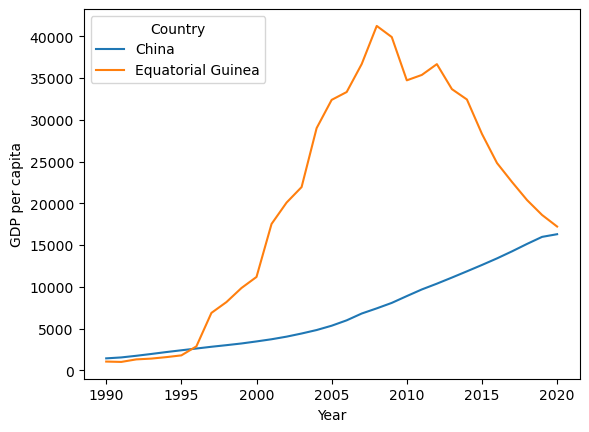

In [27]:
gdp_EGC_pivoted.plot(ylabel = 'GDP per capita')

GDP per capita trend over the years for China and Equatorial Guinea are shown. While GDP for china is increasing monotonously over the years and is at maximum for the year 2020. Equatorial Guenea on the other had shows a non-monotonous change over the years. Their GDP peaked around 2007 and has continued to decrease upto the year 2020.

Reading into another data folder : Loading continents.csv file

In [28]:
continents = pd.read_csv("../data/continents.csv")

In [29]:
gdp_df = pd.merge(gdp_df, continents, on = "Country", how = "inner")

<Axes: xlabel='Continent'>

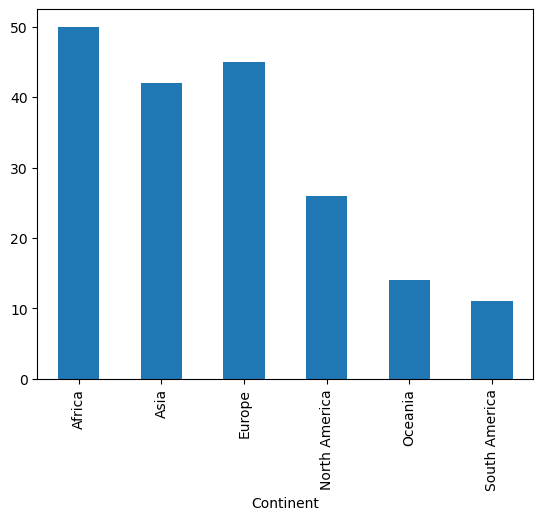

In [30]:
gdp_df.groupby('Continent').nunique()['Country'].plot(kind ='bar')

In [31]:
gdp_by_continent = pd.pivot_table(gdp_df[gdp_df['Year']==2018], index = ['Continent','Country'])

In [32]:
gdp_by_continent = gdp_by_continent.reset_index()

<Axes: xlabel='Continent', ylabel='Gdp_Per_Capita'>

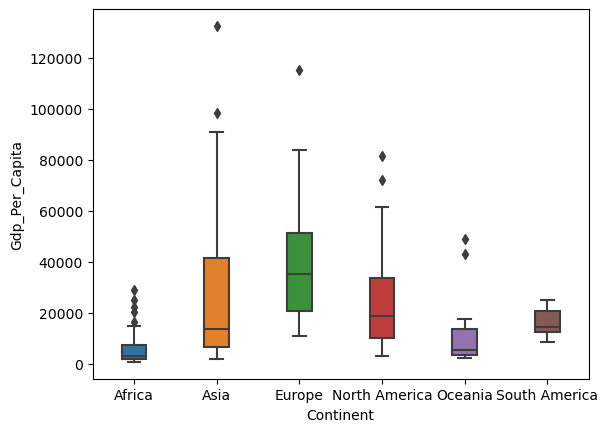

In [33]:
sns.boxplot(data = gdp_by_continent,x = 'Continent', y = 'Gdp_Per_Capita',width=0.3)

Africa has the lowest median GDP, minimum spread (min to max value) of the data and has the most outliers. Europe has the largest median GDP per capita of all continents 


In [34]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv",skiprows = 3)

In [35]:
life_expectancy = life_expectancy.drop('Unnamed: 67', axis = 1)

In [36]:
life_expectancy = life_expectancy.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)

In [37]:
life_expectancy = life_expectancy.melt(id_vars =['Country Name'],var_name= 'Year', value_name='Life_Expectancy')

In [38]:
life_expectancy[life_expectancy['Life_Expectancy']>80].sort_values('Year', ascending = True).head(2)

,Country Name,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000


Japan in 1996

In [39]:
life_expectancy.columns = ['Country','Year','Life_Expectancy']

In [40]:
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


In [41]:
life_expectancy['Year'] = life_expectancy["Year"].astype(int)

In [42]:
gdp_le = pd.merge(gdp_df,life_expectancy, on = ["Country","Year"])

In [43]:
gdp_le.tail()

,Country,Year,Gdp_Per_Capita,Continent,Life_Expectancy
5236,Zimbabwe,1994,2603.927369,Africa,52.588
5237,Zimbabwe,1993,2420.092791,Africa,54.426
5238,Zimbabwe,1992,2437.152908,Africa,56.435
5239,Zimbabwe,1991,2733.696626,Africa,58.091
5240,Zimbabwe,1990,2652.129209,Africa,59.426


In [44]:
gdp_le_2019 = gdp_le[gdp_le['Year']==2019]

In [45]:
gdp_le_2019.head()

,Country,Year,Gdp_Per_Capita,Continent,Life_Expectancy
1,Afghanistan,2019,2065.036235,Asia,63.565
20,Albania,2019,13653.201570,Europe,79.282
51,Algeria,2019,11521.984210,Africa,76.474
82,Angola,2019,6712.021615,Africa,62.448
113,Antigua and Barbuda,2019,21850.133410,North America,78.691


In [46]:
gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80]['Country'].count()

34

In [47]:
gdp_le_2019.nlargest(3,["Gdp_Per_Capita"])['Country']

2715    Macao SAR, China
2684          Luxembourg
4140           Singapore
Name: Country, dtype: object

Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [48]:
gdp_le_2019.nlargest(3,["Gdp_Per_Capita"])

,Country,Year,Gdp_Per_Capita,Continent,Life_Expectancy
2715,"Macao SAR, China",2019,127272.54850,Asia,84.978000
2684,Luxembourg,2019,116518.27680,Europe,82.639024
4140,Singapore,2019,98283.30891,Asia,83.595122


In [78]:
gdp_three = gdp_le[(gdp_le['Country']== "Macao SAR, China") | (gdp_le['Country']== "Luxembourg")| (gdp_le['Country']=='Singapore')]

/home/prahlad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


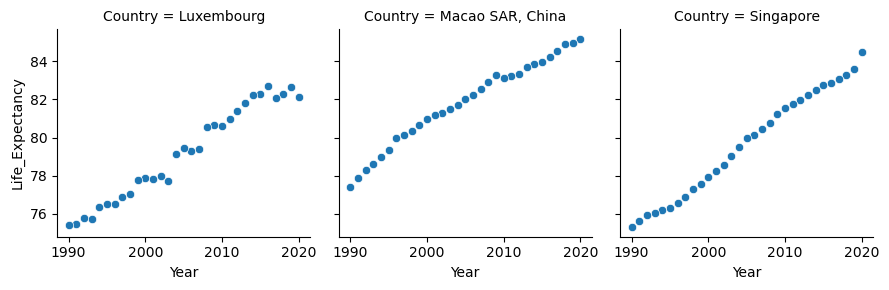

In [81]:
g = sns.FacetGrid(gdp_three, col="Country")
g.map(sns.scatterplot, "Year", "Life_Expectancy")

Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

<Axes: xlabel='Gdp_Per_Capita', ylabel='Life_Expectancy'>

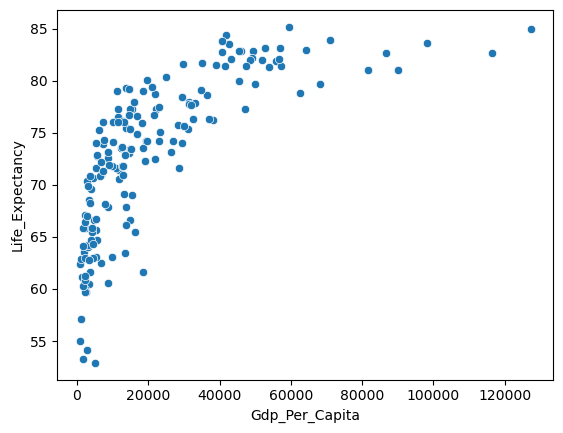

In [50]:
sns.scatterplot(gdp_le_2019, x = "Gdp_Per_Capita", y = "Life_Expectancy")

Countries with lowest GDP per capita have the lowest life expectancy and vice versa. While the relationship is not linear, there seems to be a positive correlation between GDP and life expectancy. 

In [51]:
gdp_le_2019['Gdp_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.726146825500597

A positive correlation means a positive association between the two variables. One increases with an increase in the other and vice versa. 


In [52]:
gdp_le_2019['Gdp_Per_Capita_l'] = np.log10(gdp_le_2019["Gdp_Per_Capita"])

/tmp/ipykernel_69316/2499874736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['Gdp_Per_Capita_l'] = np.log10(gdp_le_2019["Gdp_Per_Capita"])


In [53]:
gdp_le_2019.head()

,Country,Year,Gdp_Per_Capita,Continent,Life_Expectancy,Gdp_Per_Capita_l
1,Afghanistan,2019,2065.036235,Asia,63.565,3.314928
20,Albania,2019,13653.201570,Europe,79.282,4.135235
51,Algeria,2019,11521.984210,Africa,76.474,4.061527
82,Angola,2019,6712.021615,Africa,62.448,3.826853
113,Antigua and Barbuda,2019,21850.133410,North America,78.691,4.339454


<Axes: xlabel='Gdp_Per_Capita_l', ylabel='Life_Expectancy'>

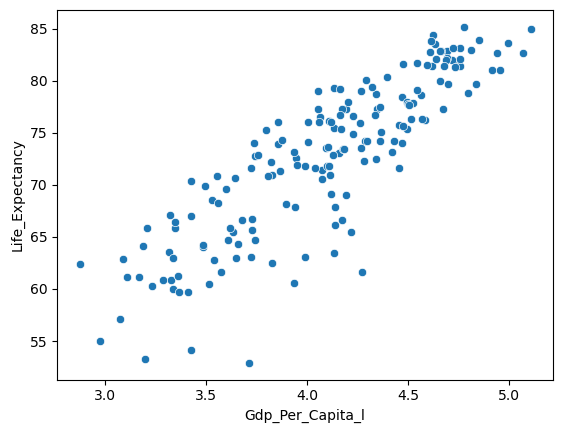

In [54]:
sns.scatterplot(gdp_le_2019, x = "Gdp_Per_Capita_l", y = "Life_Expectancy")

Data now looks more linear. The log transformation makes the data more appropriate for fitting models (in this case, linear)

In [55]:
gdp_le_2019['Gdp_Per_Capita_l'].corr(gdp_le_2019['Life_Expectancy'])

0.8627345814650407

The correlation is also closer to 1 now than before. The log transformed data (log GDP) has stronger correlation to the Life expectancy!!

In [56]:
#pd.read_csv("UNdata_Export_20230922_043522661.csv")

dashboard_df = pd.read_csv('../data/UNdata_Export_20230922_043522661.csv', sep=',', low_memory = False)


In [57]:
dashboard_df.head()

,Country or Area,Year,Area,Sex,Age,Occupation,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Argentina,2010,Total,Both Sexes,Total,"Legislators, senior officials and managers (IS...",Census - de facto - complete tabulation,"Final figure, complete",2015.0,71306.0,NaN
1,Argentina,2010,Total,Both Sexes,Total,Professionals (ISCO 88 - 2),Census - de facto - complete tabulation,"Final figure, complete",2015.0,112755.0,NaN
2,Argentina,2010,Total,Both Sexes,Total,Technicians and associate professionals (ISCO ...,Census - de facto - complete tabulation,"Final figure, complete",2015.0,39031.0,NaN
3,Argentina,2010,Total,Both Sexes,Total,Service workers and shop and market sales work...,Census - de facto - complete tabulation,"Final figure, complete",2015.0,157023.0,NaN
4,Argentina,2010,Total,Both Sexes,Total,Skilled agricultural and fishery workers (ISCO...,Census - de facto - complete tabulation,"Final figure, complete",2015.0,44089.0,NaN
